# Visualizations of Earnings report

In [171]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [246]:
# params
FP_EER_CLEAN = os.path.join('data','eer19.feather')
assert os.path.exists(FP_EER_CLEAN)

FP_FIG_TOP_OUT = os.path.join('plots','top_50_bar19.svg')
FP_FIG_OVRTM_OUT = os.path.join('plots','top_20_overtime19.svg')
FP_XDEPTS_OUT = os.path.join('plots','xdepts19.svg')
FP_OTHER_HIST19 = os.path.join('plots','other_hist19.svg')

PREFERRED_COL_NAMES = ['dept','name','title','regular','overtime','detail','longevity','incentive','severance','other','total']

matplotlib.style.use('seaborn')

In [173]:
eer = pd.read_feather(FP_EER_CLEAN)
og_cols = eer.columns
eer.columns = PREFERRED_COL_NAMES
eer.set_index('name',inplace=True)

In [214]:
count = eer.sort_values('total',ascending=False).groupby('dept').get_group('POLICE DEPARTMENT').groupby('title').count()
count[(count.T !=0).any()]

,dept,regular,overtime,detail,other,total
title,,,,,,
43PAY TRAFFIC SUPERVISOR,20,20,20,20,20,20
52PAY TRAFFIC SUPERVISOR,27,27,27,27,27,27
ACCOUNTS SUPERVISOR,1,1,1,1,1,1
ALARM OPERATOR,1,1,1,1,1,1
ANIMAL CONTRL HEARING OFF,1,1,1,1,1,1
ASSISTANT DOG OFFICER,1,1,1,1,1,1
CRIME ANALYST ASSISTANT,1,1,1,1,1,1
CRIME ANYLST MANAGER,1,1,1,1,1,1
DETAIL POLICE,18,18,18,18,18,18


In [213]:
eer.sort_values('total',ascending=False).iloc[:50].groupby('dept').get_group('POLICE DEPARTMENT')

,dept,title,regular,overtime,detail,other,total
name,,,,,,,
"BABCOCK, JOHN",POLICE DEPARTMENT,POLICE SERGEANT,80671.10,5602.16,103695.0,30354.04,220322.30
"TEMPESTA, DAVID",POLICE DEPARTMENT,POLICE LIEUTENANT,94385.16,20752.21,65414.5,29732.06,210283.93
"DALY, JOHN",POLICE DEPARTMENT,DETAIL POLICE,69332.73,0.00,22375.0,116669.11,208376.84
"MEAD, GEORGE",POLICE DEPARTMENT,POLICE LIEUTENANT,94385.16,21276.57,69942.5,17793.14,203397.37
"CLAFLIN, JOHN",POLICE DEPARTMENT,POLICE SERGEANT,80671.10,16564.36,74257.5,30221.53,201714.49
"HEALY, SEAN",POLICE DEPARTMENT,POLICE LIEUTENANT,83998.76,12221.66,69615.0,31273.48,197108.90
"DOWLING, DENNIS",POLICE DEPARTMENT,POLICE CAPTAIN,102249.98,6886.72,41935.5,37746.96,188819.16
"GEARY, DENNIS",POLICE DEPARTMENT,POLICE CAPTAIN,102249.98,13885.50,28711.0,37746.96,182593.44
"MCCARTHY, JAMES",POLICE DEPARTMENT,DETAIL POLICE,43982.70,5619.86,95937.5,35924.73,181464.79


In [212]:
count = eer.sort_values('total',ascending=False).iloc[:50].groupby('dept').get_group('SCHOOL DEPARTMENT').groupby('title').count()
count[(count.T !=0).any()]

,dept,regular,overtime,detail,other,total
title,,,,,,
ASST SUPT-SECONDARY ED,1,1,1,1,1,1
ASST SUPT-TCHNG & LRNG,1,1,1,1,1,1
ASTANT SUPERINTENDENT CAO,1,1,1,1,1,1
PRINCIPAL HIGH SCHOOL,1,1,1,1,1,1
PRINCIPAL-ELEMENTARY,1,1,1,1,1,1
PRINCIPAL-MIDDLE SCHOOL,3,3,3,3,3,3
SUPERINTENDENT OF SCHOOLS,1,1,1,1,1,1


In [221]:
eer.sort_values('total',ascending=False).groupby('dept').get_group('POLICE DEPARTMENT').regular.mean()

49785.88911290322

In [220]:
eer.sort_values('total',ascending=False).groupby('dept').get_group('POLICE DEPARTMENT').total.mean()

84249.00366935485

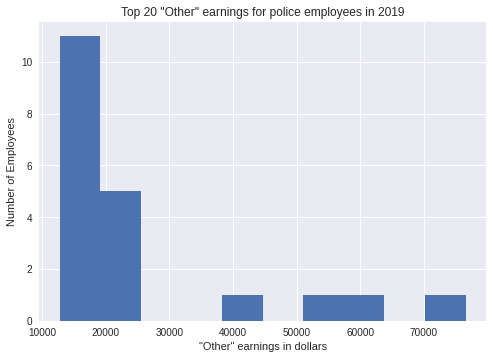

In [248]:
pd.read_feather(FP_EER_CLEAN).set_index('Employee Name').groupby('Department').get_group('POLICE DEPARTMENT').sort_values(by='Other',ascending=False).iloc[:20,:].hist(column='Other')
plt.title('Top 20 "Other" earnings for police employees in 2019')
plt.ylabel('Number of Employees')
plt.xlabel('"Other" earnings in dollars')
plt.savefig(FP_OTHER_HIST19)

In [251]:
pd.read_feather(FP_EER_CLEAN).set_index('Employee Name').groupby('Department').get_group('POLICE DEPARTMENT').Other.sum()

1587125.07

In [252]:
1587125.07/22413307

0.07081173117380671

,dept,title,regular,overtime,detail,longevity,incentive,severance,other,total
name,,,,,,,,,,
"SHAUGHNESSY, JAMES",ASSESSING,CHAIRMAN - ASSESSORS,142683.63,0.0,0.0,2500.0,0.0,0.0,1576.64,146760.27
"COHEN, ALLAN",ASSESSING,ASSESSOR,114060.62,0.0,0.0,2000.0,0.0,0.0,0.00,116060.62
"VELLUTI, DAVID",ASSESSING,ASST RESID/COMRCL ASSESSO,90888.91,0.0,0.0,1000.0,0.0,0.0,0.00,91888.91
"DOYLE, PADRAIG",ASSESSING,ASSOCIATE ASSESOR,77543.08,0.0,0.0,750.0,0.0,0.0,0.00,78293.08
"GREENWOOD, KENNETH",ASSESSING,ASST RESID ASSESSOR,77178.51,0.0,0.0,1000.0,0.0,0.0,0.00,78178.51


In [176]:
# group other category for 3 main groups
other_agg = eer.loc[:,'longevity':'other'].sum(axis=1)
eer.drop(['longevity','incentive','severance'],axis=1,inplace=True)
eer['other'] = other_agg

In [177]:
eer.loc[:,:'title'] = eer.loc[:,:'title'].astype('category')

In [178]:
eer.sort_values('total',ascending=False).head()

,dept,title,regular,overtime,detail,other,total
name,,,,,,,
"FLEISHMAN, DAVID",SCHOOL DEPARTMENT,SUPERINTENDENT OF SCHOOLS,294833.04,0.00,0.0,26669.86,321502.90
"BABCOCK, JOHN",POLICE DEPARTMENT,POLICE SERGEANT,80671.10,5602.16,103695.0,30354.04,220322.30
"JIMENEZ, ISRAEL",FIRE DEPARTMENT,DEPUTY FIRE CHIEF HQ,116670.41,23928.16,19255.0,54825.21,214678.78
"TEMPESTA, DAVID",POLICE DEPARTMENT,POLICE LIEUTENANT,94385.16,20752.21,65414.5,29732.06,210283.93
"DALY, JOHN",POLICE DEPARTMENT,DETAIL POLICE,69332.73,0.00,22375.0,116669.11,208376.84


## top 50 best paid employees

In [179]:
top_50 = pd.DataFrame(eer.sort_values(by='total',ascending=False).iloc[:50,:])

In [180]:
top_50.head(20)

,dept,title,regular,overtime,detail,other,total
name,,,,,,,
"FLEISHMAN, DAVID",SCHOOL DEPARTMENT,SUPERINTENDENT OF SCHOOLS,294833.04,0.00,0.00,26669.86,321502.90
"BABCOCK, JOHN",POLICE DEPARTMENT,POLICE SERGEANT,80671.10,5602.16,103695.00,30354.04,220322.30
"JIMENEZ, ISRAEL",FIRE DEPARTMENT,DEPUTY FIRE CHIEF HQ,116670.41,23928.16,19255.00,54825.21,214678.78
"TEMPESTA, DAVID",POLICE DEPARTMENT,POLICE LIEUTENANT,94385.16,20752.21,65414.50,29732.06,210283.93
"DALY, JOHN",POLICE DEPARTMENT,DETAIL POLICE,69332.73,0.00,22375.00,116669.11,208376.84
"MEAD, GEORGE",POLICE DEPARTMENT,POLICE LIEUTENANT,94385.16,21276.57,69942.50,17793.14,203397.37
"CLAFLIN, JOHN",POLICE DEPARTMENT,POLICE SERGEANT,80671.10,16564.36,74257.50,30221.53,201714.49
"DAGOSTINO, CARMINE",FIRE DEPARTMENT,FIRE CAPTAIN,99718.13,45447.53,20635.00,32558.99,198359.65
"HEALY, SEAN",POLICE DEPARTMENT,POLICE LIEUTENANT,83998.76,12221.66,69615.00,31273.48,197108.90


In [181]:
top_50_count = top_50.groupby('dept').count().total

In [182]:
mask = (top_50_count.values!=0)
top_50_count = top_50_count[mask]
top_50_count

dept
BUILDING DEPARTMENT     1
EXECUTIVE               2
FIRE DEPARTMENT        15
POLICE DEPARTMENT      23
SCHOOL DEPARTMENT       9
Name: total, dtype: int64

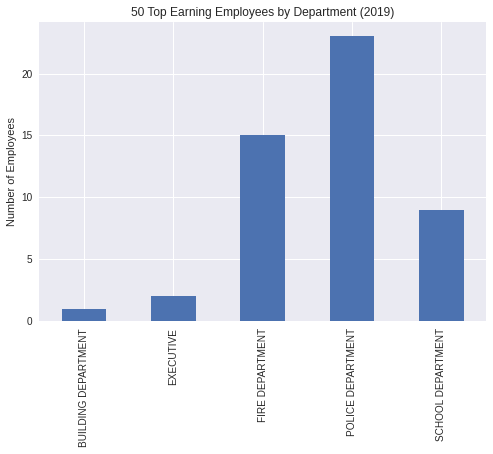

In [184]:
top_50_count.plot.bar()
plt.title('50 Top Earning Employees by Department (2019)')
plt.ylabel('Number of Employees')
plt.xlabel('')
plt.legend().remove()
plt.savefig(FP_FIG_TOP_OUT)

## Best earning police

In [185]:
cop = eer.groupby('dept').get_group('POLICE DEPARTMENT').sort_values('total',ascending=False)

In [186]:
cop.head()

,dept,title,regular,overtime,detail,other,total
name,,,,,,,
"BABCOCK, JOHN",POLICE DEPARTMENT,POLICE SERGEANT,80671.10,5602.16,103695.0,30354.04,220322.30
"TEMPESTA, DAVID",POLICE DEPARTMENT,POLICE LIEUTENANT,94385.16,20752.21,65414.5,29732.06,210283.93
"DALY, JOHN",POLICE DEPARTMENT,DETAIL POLICE,69332.73,0.00,22375.0,116669.11,208376.84
"MEAD, GEORGE",POLICE DEPARTMENT,POLICE LIEUTENANT,94385.16,21276.57,69942.5,17793.14,203397.37
"CLAFLIN, JOHN",POLICE DEPARTMENT,POLICE SERGEANT,80671.10,16564.36,74257.5,30221.53,201714.49


In [259]:
cop.sort_values(by='regular',ascending=False).head(50)

,dept,title,regular,overtime,detail,other,total
name,,,,,,,
"SMITH, STEVEN",POLICE DEPARTMENT,IT DIRECTOR POLICE,139653.88,0.00,0.0,900.00,140553.88
"MCMAINS, GEORGE",POLICE DEPARTMENT,EXECUTIVE OFFICER-POLICE,109703.77,0.00,1408.0,69626.34,180738.11
"SPALDING, WILLIAM",POLICE DEPARTMENT,POLICE CAPTAIN,102249.98,7338.85,3954.0,36762.96,150305.79
"DOWLING, DENNIS",POLICE DEPARTMENT,POLICE CAPTAIN,102249.98,6886.72,41935.5,37746.96,188819.16
"GEARY, DENNIS",POLICE DEPARTMENT,POLICE CAPTAIN,102249.98,13885.50,28711.0,37746.96,182593.44
"MARZILLI, CHRISTOPHER",POLICE DEPARTMENT,POLICE CAPTAIN,102249.98,9311.74,19260.0,38036.96,168858.68
"BERUBE, DENNIS",POLICE DEPARTMENT,POLICE CAPTAIN,102249.98,12124.03,3240.5,37746.96,155361.47
"ANASTASIA, PAUL",POLICE DEPARTMENT,POLICE CAPTAIN,102249.98,22408.54,14522.0,37746.96,176927.48
"TEMPESTA, DAVID",POLICE DEPARTMENT,POLICE LIEUTENANT,94385.16,20752.21,65414.5,29732.06,210283.93


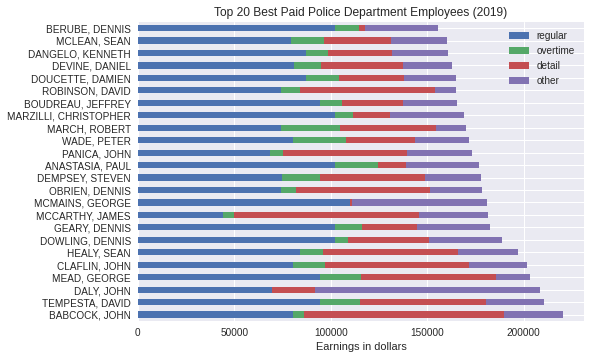

In [195]:
cop.iloc[:24,:].reset_index().plot.barh(x = 'name',y=['regular','overtime','detail','other'],stacked=True)
plt.xlabel('Earnings in dollars')
plt.ylabel('')
plt.title('Top 20 Best Paid Police Department Employees (2019)')
plt.savefig(FP_FIG_OVRTM_OUT)

# Across departments

In [188]:
depts = eer.groupby('dept').sum()

In [189]:
depts_norm = depts.loc[:,'regular':'other'].divide(depts.loc[:,'total'],axis=0)

In [190]:
depts_norm['total'] = depts_norm.sum(axis=1)

In [191]:
depts_norm

,regular,overtime,detail,other,total
dept,,,,,
ASSESSING,0.958424,0.000000,0.000000,0.041576,1.0
BUILDING DEPARTMENT,0.725085,0.177703,0.000000,0.097212,1.0
CITY CLERK,0.955484,0.003974,0.000000,0.040543,1.0
CITY COUNCIL,0.992789,0.000010,0.000000,0.007201,1.0
COMPTROLLER,0.922360,0.000000,0.000000,0.077640,1.0
ELECTIONS,0.313920,0.000000,0.000000,0.686080,1.0
EXECUTIVE,0.997444,0.000229,0.000000,0.002326,1.0
FINANCIAL INFORMATION SYS,0.983020,0.000000,0.000000,0.016980,1.0
FIRE DEPARTMENT,0.686421,0.083497,0.038217,0.191864,1.0


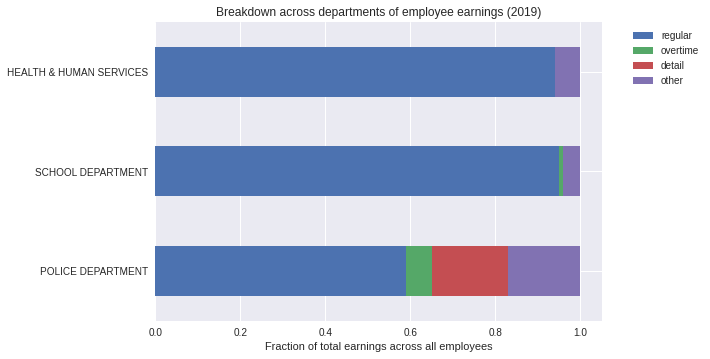

In [250]:
DEPTS_TO_PLOT = ['POLICE DEPARTMENT','SCHOOL DEPARTMENT','HEALTH & HUMAN SERVICES']
depts.loc[DEPTS_TO_PLOT,'regular':'other'].divide(depts.loc[DEPTS_TO_PLOT,'total'],axis=0).round(2).plot.barh(stacked=True)
plt.legend(bbox_to_anchor=[1.05,1])
plt.ylabel('')
plt.xlabel('Fraction of total earnings across all employees')
plt.title('Breakdown across departments of employee earnings (2019)')
plt.savefig(FP_XDEPTS_OUT)